In [1]:
import numpy as np
import soundfile as sf
import os
import scipy
import matplotlib.pyplot as plt
from data_loader import DataLoader

In [2]:
#leftMikroData, _= sf.read("/Users/axel/KWS/audio/experiment/left_mikro_cal_noise.wav")
#rightMikroData, _= sf.read("/Users/axel/KWS/audio/experiment/right_mikro_cal_noise.wav")
input_path = "/Users/axel/KWS/audio/experiment/calibration_verification.bin"

AudioReader = DataLoader(data_format='pcm', bits_per_sample=16, sample_frequency=16000, \
                         audio_channels=2, LRswap=False)
AudioReader.stream_input_parse(input_path)

# High pass filter integrated in apollo MCU
HP_Gain = np.int('0x4', 16) * (-1)

filtNumer = np.array([1., -1.], dtype=float)

filtDenom = np.array([1, -(1-2**HP_Gain)], dtype=float)

filt_pcmLeftData = scipy.signal.lfilter(filtNumer, filtDenom, AudioReader.pcmLeftStream)
filt_pcmRightData = scipy.signal.lfilter(filtNumer, filtDenom, AudioReader.pcmRightStream)

read input file of 362560 bytes...


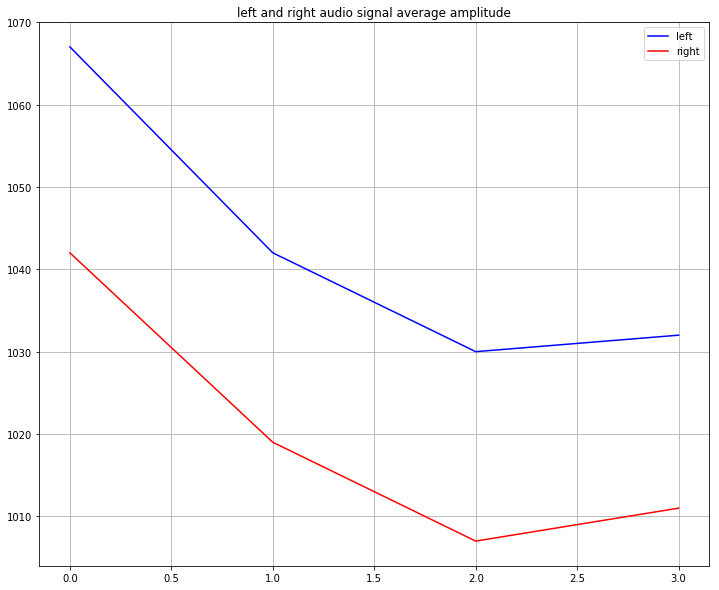

In [3]:
# shift average calculation
blockSize = 16000
hop = 16000
step = 4

leftMikroMean = np.array([0]*step, dtype=np.int16)
rightMikroMean = np.array([0]*step, dtype=np.int16)

for idx in range(0, step):
    #leftMikroMean[idx] = np.mean(np.abs(filt_pcmLeftData[idx*hop:idx*hop+blockSize]))
    #rightMikroMean[idx] = np.mean(np.abs(filt_pcmRightData[idx*hop:idx*hop+blockSize]))
    leftMikroMean[idx] = np.mean(np.abs(AudioReader.pcmLeftStream[idx*hop:idx*hop+blockSize]))
    rightMikroMean[idx] = np.mean(np.abs(AudioReader.pcmRightStream[idx*hop:idx*hop+blockSize]))
    
fig = plt.figure(figsize=(12,10))
plt.title("left and right audio signal average amplitude")
plt.plot(leftMikroMean, 'b')
plt.plot(rightMikroMean, 'r')
plt.legend(('left', 'right'), loc='best')
plt.grid(True)
plt.show()    



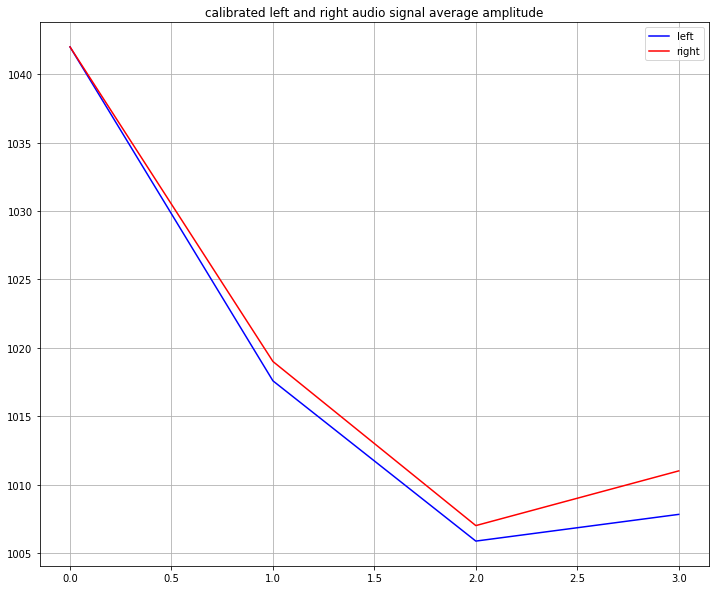

In [4]:
calScalar = rightMikroMean[0] / leftMikroMean[0]

scalar = np.array([0.0]*step, dtype=np.float)
for index in range(len(leftMikroMean)):
    scalar[index] = leftMikroMean[index] / rightMikroMean[index]

leftMikroMean = leftMikroMean * calScalar

fig = plt.figure(figsize=(12,10))
plt.title("calibrated left and right audio signal average amplitude")
plt.plot(leftMikroMean, 'b')
plt.plot(rightMikroMean, 'r')
plt.legend(('left', 'right'), loc='best')
plt.grid(True)
plt.show()    

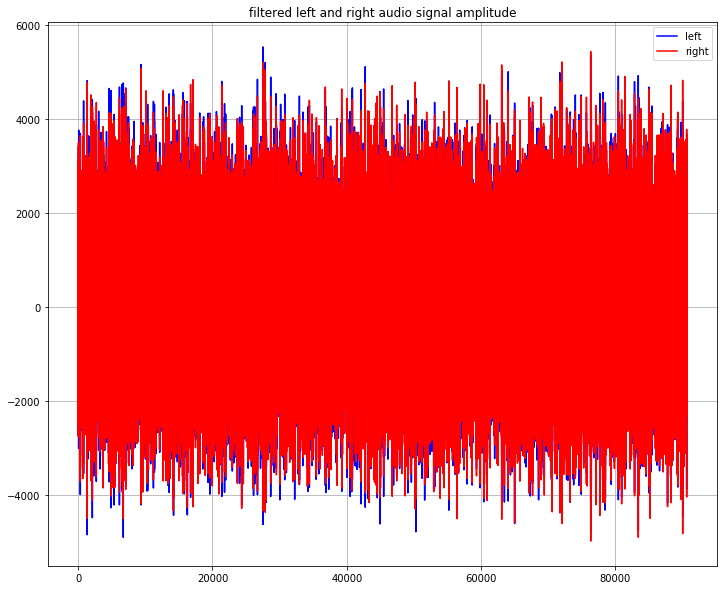

In [5]:
fig = plt.figure(figsize=(12,10))
plt.title("filtered left and right audio signal amplitude")
plt.plot(filt_pcmLeftData, 'b')
plt.plot(filt_pcmRightData, 'r')
plt.legend(('left', 'right'), loc='best')
plt.grid(True)
plt.show()    

0.93537414


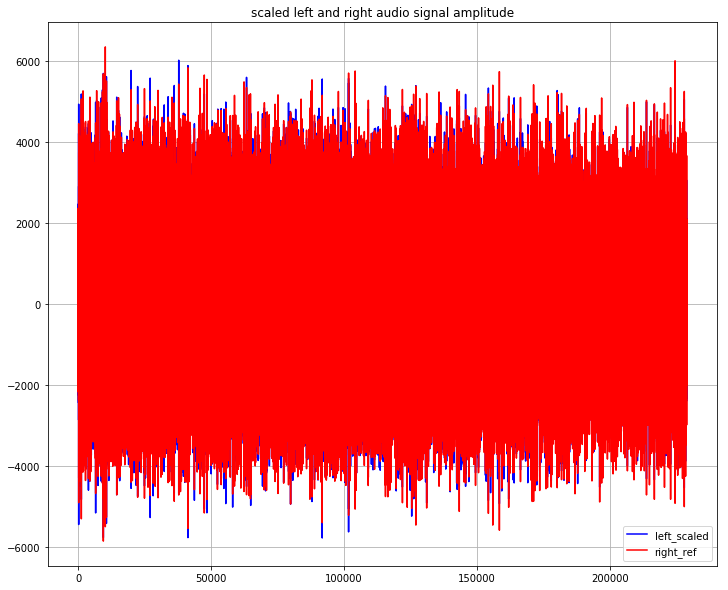

In [63]:
refData = filt_pcmRightData
scalData = filt_pcmLeftData * calScalar
print(calScalar)

fig = plt.figure(figsize=(12,10))
plt.title("scaled left and right audio signal amplitude")
plt.plot(scalData, 'b')
plt.plot(refData, 'r')
plt.legend(('left_scaled', 'right_ref'), loc='best')
plt.grid(True)
plt.show()    

In [21]:
with open('capture_no_pga_-6dBV_1V_offset_-104dB_THDN.txt') as f:
    analog_data = f.read()

In [22]:
analog_data = analog_data.split()

In [28]:
audio = np.array(analog_data, dtype=np.int32)

In [37]:
sf.write('test.wav', audio, 16000, subtype="FLOAT")

In [38]:
data_read, sr = sf.read('test.wav')

In [39]:
data_read[:10]

array([14442., 12640., 10322.,  7820.,  5447.,  3662.,  2746.,  2783.,
        3761.,  5579.])

In [40]:
audio[:10]

array([14442, 12640, 10322,  7820,  5447,  3662,  2746,  2783,  3761,
        5579], dtype=int32)